# Loading of data


1.   If the data is in Google Drive, just specify the path in the ***google.colab import***
2.   If the data is in local drive, skip the first ***google.colab import*** specify the path of the file in the ***pd.read_csv function***



In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
metabolite = pd.read_csv("/content/drive/My Drive/omicsEye/PUBH6859/metabolites.txt", sep="\t",header = None)

metabolite

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592
0,NaN,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
1,31593.0,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.92545,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.95428,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.33838,1.040741,30.724224,2.016838,1.041511,3.165958,1.468915,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.17372,0.255931,1.564567,2.776705,0.885554,0.024495,1.84977,47.868225,6.558881,0.492449,0.472759,4.286731,0.72338,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
2,31595.0,0.778072,0.854428,1.052241,1.809722,1.124312,1.03585,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.33384,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.91191,1.083882,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.18982,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914
3,31597.0,0.994348,0.678962,1.685811,2.673036,0.964949,0.692393,3.547813,0.539718,1.694619,1.326984,2.727649,4.505597,2.321881,0.556639,1.175243,1.645329,4.120117,1.027391,7.964828,12.163894,1.526481,3.422024,0.516289,20.562691,4.823588,2.010484,0.998084,6.120318,1.971366,1.762844,0.579818,3.161732,0.905749,0.691792,33.255497,1.915898,0.842633,6.505247,0.66481,...,1.679782,1.213876,1.20355,2.436038,0.427548,1.600141,0.535905,0.337627,0.072943,0.181999,3.467764,2.103884,2.765389,1.154591,6.080456,27.918341,3.348258,0.024495,1.088804,31.886192,14.071503,0.851228,2.077155,3.722162,3.288469,1,0.027885,3.67949,0.075804,4.042885,1.162273,0.665749,0.363288,0.425712,2.176631,3.823018,8.081828,8.470854,2.197779,3.794518
4,31599.0,0.853183,1.018974,0.846395,4.144006,1.174095,0.999712,4.086068,0.782801,2.156129,0.88544,2.404563,1.874684,0.989851,0.767781,1.666952,3.430455,1.514929,1.475181,7.636902,1.001398,1.967933,1.279699,0.187902,19.19182,2.222435,0.554168,1.35426

In [23]:
info = pd.read_csv("/content/drive/My Drive/omicsEye/PUBH6859/sample_info.txt", sep="\t", header=None)
info

,0,1,2,3,4,5,6
0,NaN,Group,Time,Aorta_Portal,Position,Position2,Animal
1,31592.0,1_RYGB,Week 1,A,C,P3,RYGB 7
2,31593.0,1_RYGB,Week 1,P,C,P4,RYGB 7
3,31594.0,1_RYGB,Week 1,A,C,P5,RYGB 8
4,31595.0,1_RYGB,Week 1,P,C,P6,RYGB 8
...,...,...,...,...,...,...,...
96,31687.0,4_Weight Matched,Month 3,P,J,P4,WM-3 3
97,31688.0,4_Weight Matched,Month 3,A,J,P5,WM-4 3
98,31689.0,4_Weight Matched,Month 3,P,J,P6,WM-4 3
99,31690.0,4_Weight Matched,Month 3,A,J,P7,WM-5 3


# Data cleaning & Data preparation

1.   The data is transposed to fit the desired format
2.   the NaN(Not a Number) values are taken care here by droping them, from the data itself.

1.   The datasets are merged to form the complete dataset that is required for the study.

1.   Missing row names are added and some missing values which are not NaN are also taken care of

















In [24]:
metabolite.columns = metabolite.iloc[0]
metabolite = metabolite.drop(metabolite.index[0])
metabolite

,NaN,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
1,31593.0,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.92545,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.95428,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.33838,1.040741,30.724224,2.016838,1.041511,3.165958,1.468915,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.17372,0.255931,1.564567,2.776705,0.885554,0.024495,1.84977,47.868225,6.558881,0.492449,0.472759,4.286731,0.72338,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
2,31595.0,0.778072,0.854428,1.052241,1.809722,1.124312,1.03585,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.33384,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.91191,1.083882,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.18982,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914
3,31597.0,0.994348,0.678962,1.685811,2.673036,0.964949,0.692393,3.547813,0.539718,1.694619,1.326984,2.727649,4.505597,2.321881,0.556639,1.175243,1.645329,4.120117,1.027391,7.964828,12.163894,1.526481,3.422024,0.516289,20.562691,4.823588,2.010484,0.998084,6.120318,1.971366,1.762844,0.579818,3.161732,0.905749,0.691792,33.255497,1.915898,0.842633,6.505247,0.66481,...,1.679782,1.213876,1.20355,2.436038,0.427548,1.600141,0.535905,0.337627,0.072943,0.181999,3.467764,2.103884,2.765389,1.154591,6.080456,27.918341,3.348258,0.024495,1.088804,31.886192,14.071503,0.851228,2.077155,3.722162,3.288469,1,0.027885,3.67949,0.075804,4.042885,1.162273,0.665749,0.363288,0.425712,2.176631,3.823018,8.081828,8.470854,2.197779,3.794518
4,31599.0,0.853183,1.018974,0.846395,4.144006,1.174095,0.999712,4.086068,0.782801,2.156129,0.88544,2.404563,1.874684,0.989851,0.767781,1.666952,3.430455,1.514929,1.475181,7.636902,1.001398,1.967933,1.279699,0.187902,19.19182,2.222435,0.554168,1.354266,10.42614,5.208524,1.98782,1.295995,2.671886,2.779001,1.199335,33.009239,2.161645,1.195299,3.072445,1.546912,...,1.710967,1.19374,1.206329,2.927879,1.529254,0.584887,1.435459,0.213593,1.938642,1.424512,0.417923,2.552179,7.184206,0.255931,1.292334,3.324645,1.354726,0.024495,2

In [25]:
 metabolite = metabolite.rename(columns=str).rename(columns={'nan':'Sample_ID'})

In [26]:
metabolite = metabolite.dropna(axis =1)
metabolite

,Sample_ID,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
1,31593.0,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.92545,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.95428,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.33838,1.040741,30.724224,2.016838,1.041511,3.165958,1.468915,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.17372,0.255931,1.564567,2.776705,0.885554,0.024495,1.84977,47.868225,6.558881,0.492449,0.472759,4.286731,0.72338,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
2,31595.0,0.778072,0.854428,1.052241,1.809722,1.124312,1.03585,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.33384,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.91191,1.083882,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.18982,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914
3,31597.0,0.994348,0.678962,1.685811,2.673036,0.964949,0.692393,3.547813,0.539718,1.694619,1.326984,2.727649,4.505597,2.321881,0.556639,1.175243,1.645329,4.120117,1.027391,7.964828,12.163894,1.526481,3.422024,0.516289,20.562691,4.823588,2.010484,0.998084,6.120318,1.971366,1.762844,0.579818,3.161732,0.905749,0.691792,33.255497,1.915898,0.842633,6.505247,0.66481,...,1.679782,1.213876,1.20355,2.436038,0.427548,1.600141,0.535905,0.337627,0.072943,0.181999,3.467764,2.103884,2.765389,1.154591,6.080456,27.918341,3.348258,0.024495,1.088804,31.886192,14.071503,0.851228,2.077155,3.722162,3.288469,1,0.027885,3.67949,0.075804,4.042885,1.162273,0.665749,0.363288,0.425712,2.176631,3.823018,8.081828,8.470854,2.197779,3.794518
4,31599.0,0.853183,1.018974,0.846395,4.144006,1.174095,0.999712,4.086068,0.782801,2.156129,0.88544,2.404563,1.874684,0.989851,0.767781,1.666952,3.430455,1.514929,1.475181,7.636902,1.001398,1.967933,1.279699,0.187902,19.19182,2.222435,0.554168,1.354266,10.42614,5.208524,1.98782,1.295995,2.671886,2.779001,1.199335,33.009239,2.161645,1.195299,3.072445,1.546912,...,1.710967,1.19374,1.206329,2.927879,1.529254,0.584887,1.435459,0.213593,1.938642,1.424512,0.417923,2.552179,7.184206,0.255931,1.292334,3.324645,1.354726,0.02

In [27]:
info

,0,1,2,3,4,5,6
0,NaN,Group,Time,Aorta_Portal,Position,Position2,Animal
1,31592.0,1_RYGB,Week 1,A,C,P3,RYGB 7
2,31593.0,1_RYGB,Week 1,P,C,P4,RYGB 7
3,31594.0,1_RYGB,Week 1,A,C,P5,RYGB 8
4,31595.0,1_RYGB,Week 1,P,C,P6,RYGB 8
...,...,...,...,...,...,...,...
96,31687.0,4_Weight Matched,Month 3,P,J,P4,WM-3 3
97,31688.0,4_Weight Matched,Month 3,A,J,P5,WM-4 3
98,31689.0,4_Weight Matched,Month 3,P,J,P6,WM-4 3
99,31690.0,4_Weight Matched,Month 3,A,J,P7,WM-5 3


In [28]:
info.columns = info.iloc[0]
info = info.drop(info.index[0])
info

,NaN,Group,Time,Aorta_Portal,Position,Position2,Animal
1,31592.0,1_RYGB,Week 1,A,C,P3,RYGB 7
2,31593.0,1_RYGB,Week 1,P,C,P4,RYGB 7
3,31594.0,1_RYGB,Week 1,A,C,P5,RYGB 8
4,31595.0,1_RYGB,Week 1,P,C,P6,RYGB 8
5,31596.0,1_RYGB,Week 1,A,C,P7,RYGB 9
...,...,...,...,...,...,...,...
96,31687.0,4_Weight Matched,Month 3,P,J,P4,WM-3 3
97,31688.0,4_Weight Matched,Month 3,A,J,P5,WM-4 3
98,31689.0,4_Weight Matched,Month 3,P,J,P6,WM-4 3
99,31690.0,4_Weight Matched,Month 3,A,J,P7,WM-5 3


In [29]:
info.columns

Index([nan, 'Group', 'Time', 'Aorta_Portal', 'Position', 'Position2',
       'Animal'],
      dtype='object', name=0)

In [30]:
info = info.rename(columns=str).rename(columns={'nan':'Sample_ID'})
info

,Sample_ID,Group,Time,Aorta_Portal,Position,Position2,Animal
1,31592.0,1_RYGB,Week 1,A,C,P3,RYGB 7
2,31593.0,1_RYGB,Week 1,P,C,P4,RYGB 7
3,31594.0,1_RYGB,Week 1,A,C,P5,RYGB 8
4,31595.0,1_RYGB,Week 1,P,C,P6,RYGB 8
5,31596.0,1_RYGB,Week 1,A,C,P7,RYGB 9
...,...,...,...,...,...,...,...
96,31687.0,4_Weight Matched,Month 3,P,J,P4,WM-3 3
97,31688.0,4_Weight Matched,Month 3,A,J,P5,WM-4 3
98,31689.0,4_Weight Matched,Month 3,P,J,P6,WM-4 3
99,31690.0,4_Weight Matched,Month 3,A,J,P7,WM-5 3


In [31]:
info  = info.loc[:,["Sample_ID","Group","Time"]] #
info

,Sample_ID,Group,Time
1,31592.0,1_RYGB,Week 1
2,31593.0,1_RYGB,Week 1
3,31594.0,1_RYGB,Week 1
4,31595.0,1_RYGB,Week 1
5,31596.0,1_RYGB,Week 1
...,...,...,...
96,31687.0,4_Weight Matched,Month 3
97,31688.0,4_Weight Matched,Month 3
98,31689.0,4_Weight Matched,Month 3
99,31690.0,4_Weight Matched,Month 3


In [32]:
df = pd.merge(info, metabolite, on=['Sample_ID'])
df

,Sample_ID,Group,Time,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
0,31593.0,1_RYGB,Week 1,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.92545,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.95428,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.33838,1.040741,30.724224,2.016838,1.041511,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.17372,0.255931,1.564567,2.776705,0.885554,0.024495,1.84977,47.868225,6.558881,0.492449,0.472759,4.286731,0.72338,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
1,31595.0,1_RYGB,Week 1,0.778072,0.854428,1.052241,1.809722,1.124312,1.03585,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.33384,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.18982,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914
2,31597.0,1_RYGB,Week 1,0.994348,0.678962,1.685811,2.673036,0.964949,0.692393,3.547813,0.539718,1.694619,1.326984,2.727649,4.505597,2.321881,0.556639,1.175243,1.645329,4.120117,1.027391,7.964828,12.163894,1.526481,3.422024,0.516289,20.562691,4.823588,2.010484,0.998084,6.120318,1.971366,1.762844,0.579818,3.161732,0.905749,0.691792,33.255497,1.915898,0.842633,...,1.679782,1.213876,1.20355,2.436038,0.427548,1.600141,0.535905,0.337627,0.072943,0.181999,3.467764,2.103884,2.765389,1.154591,6.080456,27.918341,3.348258,0.024495,1.088804,31.886192,14.071503,0.851228,2.077155,3.722162,3.288469,1,0.027885,3.67949,0.075804,4.042885,1.162273,0.665749,0.363288,0.425712,2.176631,3.823018,8.081828,8.470854,2.197779,3.794518
3,31599.0,1_RYGB,Week 1,0.853183,1.018974,0.846395,4.144006,1.174095,0.999712,4.086068,0.782801,2.156129,0.88544,2.404563,1.874684,0.989851,0.767781,1.666952,3.430455,1.514929,1.475181,7.636902,1.001398,1.967933,1.279699,0.187902,19.19182,2.222435,0.554168,1.354266,10.42614,5.208524,1.98782,1.295995,2.671886,2.779001,1.199335,33.009239,2.161645,1.195299,...,1.710967,1.19374,1.206329,2.927879,1.529254,0.584887,1.435459,0.213593,1.938642,1.424512,0.417923,2.552179,7.184206,0.255931,1.292334,3.324645,1.354726,0.024495,2.133821,51.098412,7.4393

In [33]:
# Pull out the unique groups within Group
y = list(df.Group.unique())
y

['1_RYGB', '2_Sham', '4_Weight Matched']

## **Research Question**: Among the first five metabolites, are any metabolite intensities different among health outcomes?

**Method**: Kruskal–Wallis test & other visualizations. Kruskal-Wallis Test determines if the medians of the three groups above are different. It tells you if there is a significant difference between the groups but does not tell among which groups the significant difference lies.

In [34]:
stats.kruskal(df[df.Group == y[0]].glycine, df[df.Group == y[1]].glycine,df[df.Group == y[2]].glycine)

KruskalResult(statistic=8.740645161290317, pvalue=0.012647160180823173)

In [55]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
sns.set_theme(style="whitegrid")
glycine = df.loc[:, ["glycine","Group"]]#filter
glycine['glycine']=glycine['glycine'].astype(str).astype(float)
glycine["Group"] = lb_make.fit_transform(glycine["Group"])
glycine

,glycine,Group
0,0.764476,0
1,0.778072,0
2,0.994348,0
3,0.853183,0
4,0.830975,0
5,0.741821,1
6,1.345114,1
7,1.048042,1
8,0.955684,1
9,0.607936,1


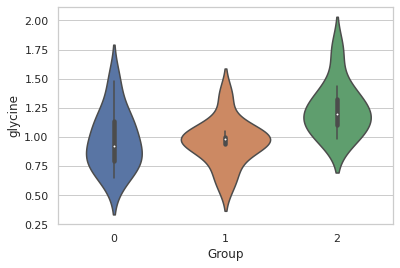

In [54]:
ax = sns.violinplot(x = "Group",y = "glycine", data = glycine)

The intensity of glycine is significantly different among the three groups.

In [37]:
stats.kruskal(df[df.Group == y[0]].sarcosine, df[df.Group == y[1]].sarcosine,df[df.Group == y[2]].sarcosine)

KruskalResult(statistic=5.142434356920353, pvalue=0.07644244467818909)

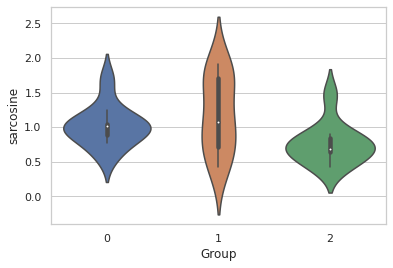

In [45]:
lb_make = LabelEncoder()
sarcosine = df.loc[:, ["sarcosine","Group"]]#filter
sarcosine['sarcosine']=sarcosine['sarcosine'].astype(str).astype(float)
sarcosine["Group"] = lb_make.fit_transform(sarcosine["Group"])
ax = sns.violinplot(x = "Group",y = "sarcosine", data = sarcosine)

The intensity of sarcosine is not significantly different among the three groups.

In [ ]:
stats.kruskal(df[df.Group == y[0]].serine, df[df.Group == y[1]].serine,df[df.Group == y[2]].serine)

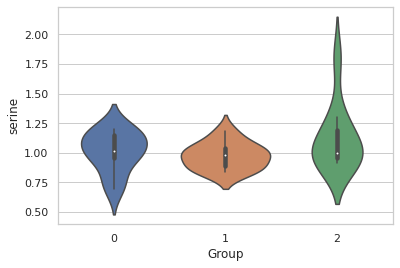

In [46]:
lb_make = LabelEncoder()
serine = df.loc[:, ["serine","Group"]]#filter
serine['serine']=serine['serine'].astype(str).astype(float)
serine["Group"] = lb_make.fit_transform(serine["Group"])
ax = sns.violinplot(x = "Group",y = "serine", data = serine)

The intensity of serine is not significantly different among the three groups.

In [52]:
stats.kruskal(df[df.Group == y[0]].dimethylglycine, df[df.Group == y[1]].dimethylglycine,df[df.Group == y[2]].dimethylglycine)

KruskalResult(statistic=10.753548387096771, pvalue=0.004622709871601348)

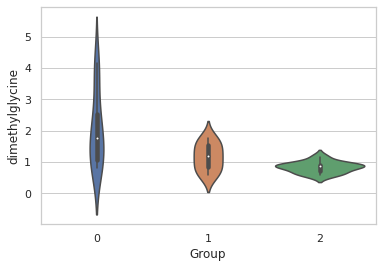

In [53]:
lb_make = LabelEncoder()
dimethylglycine = df.loc[:, ["dimethylglycine","Group"]]#filter
dimethylglycine['dimethylglycine']=dimethylglycine['dimethylglycine'].astype(str).astype(float)
dimethylglycine["Group"] = lb_make.fit_transform(dimethylglycine["Group"])
ax = sns.violinplot(x = "Group",y = "dimethylglycine", data = dimethylglycine)

The intensity of dimethlyglycine is significantly different among the three groups.

In [ ]:
stats.kruskal(df[df.Group == y[0]].betaine, df[df.Group == y[1]].betaine,df[df.Group == y[2]].betaine)

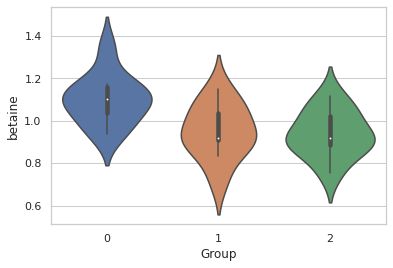

In [48]:
lb_make = LabelEncoder()
betaine = df.loc[:, ["betaine","Group"]]#filter
betaine['betaine']=betaine['betaine'].astype(str).astype(float)
betaine["Group"] = lb_make.fit_transform(betaine["Group"])
ax = sns.violinplot(x = "Group",y = "betaine", data = betaine)

The intensity of betaine is significantly different among the three groups.

**Conclusion**: Among the five metabolites, the intensities of glycine, dimethylglycine, and betaine are significantly different among the three groups: '1_RYGB' (0), '2_Sham' (1), '4_Weight Matched' (2).

**Further Studies**: We should determine a way to rank the most important metabolites to the study and measure the difference of metabolite intensity from there. Right now, these five metabolites are an arbitrary sub-sample of the dataset.